# Covid Lockdown Tracker for Select Counties in NY 

On October 21st Governor Cuomo released guidlines for when New York counties would go into lockdown https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics.  This notebook keeps track of the lockdown status for several counties in New York.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('https://health.data.ny.gov/api/views/xdss-u53e/rows.csv?accessType=DOWNLOAD',
               parse_dates=['Test Date'])
df=df.groupby(['County','Test Date']).sum()

# Westchester County

FOR RED ZONE STATUS

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average  

In [3]:
westchester=pd.DataFrame(df.loc['Westchester'])
westchester['New Positives/Total Tests']=westchester['New Positives']/westchester['Total Number of Tests Performed']
westchester['pos_hundred_thousand']=(westchester['New Positives']*100000)/967506
westchester.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,600,85020,9769,1636125,0.061419,62.015119
2021-01-19,703,85723,9638,1645763,0.072940,72.661048
2021-01-20,923,86646,12663,1658426,0.072890,95.399925
2021-01-21,924,87570,13629,1672055,0.067797,95.503284
2021-01-22,834,88404,13024,1685079,0.064036,86.201016
2021-01-23,821,89225,14160,1699239,0.057980,84.857355
2021-01-24,804,90029,12366,1711605,0.065017,83.100260
2021-01-25,636,90665,8951,1720556,0.071054,65.736026
2021-01-26,558,91223,8454,1729010,0.066004,57.674061


In [4]:
westchester['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.066878
2021-01-23    0.066166
2021-01-24    0.066011
2021-01-25    0.067388
2021-01-26    0.066397
2021-01-27    0.064664
2021-01-28    0.062472
2021-01-29    0.061770
2021-01-30    0.061045
2021-01-31    0.058811
Name: New Positives/Total Tests, dtype: float64

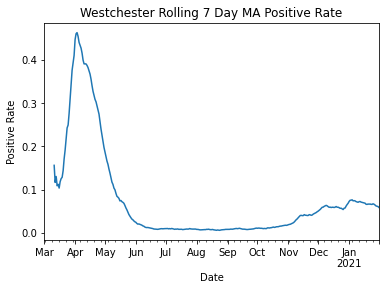

In [5]:
westchester['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Westchester Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [6]:
westchester['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    80.782076
2021-01-23    81.461289
2021-01-24    82.819715
2021-01-25    83.351273
2021-01-26    81.210275
2021-01-27    79.969973
2021-01-28    77.134996
2021-01-29    76.500079
2021-01-30    73.665102
2021-01-31    68.940141
Name: pos_hundred_thousand, dtype: float64

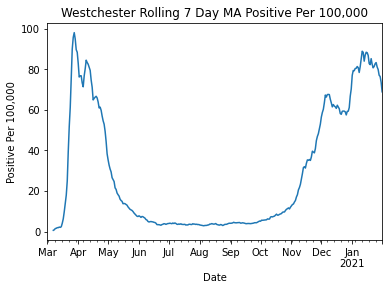

In [7]:
westchester['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Westchester Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Per 100,000')
plt.show()

In [8]:
per_cap=np.sum(westchester['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(westchester['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >=.4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate<=.2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# Ulster County

FOR POSSIBLE RED ZONE STATUS

Geographic area has 7-day rolling average positivity above 5% for 10 days  

AND  

Geographic area has 12 or more new daily cases per 100,000 residents on 7-day average  

In [9]:
ulster=df.loc['Ulster']
ulster['New Positives/Total Tests']=ulster['New Positives']/ulster['Total Number of Tests Performed']
ulster['pos_hundred_thousand']=(ulster['New Positives']*100000)/177573
ulster.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,103,7745,1249,231100,0.082466,58.004314
2021-01-19,77,7822,1123,232223,0.068566,43.362448
2021-01-20,79,7901,1749,233972,0.045169,44.488745
2021-01-21,116,8017,2411,236383,0.048113,65.325247
2021-01-22,112,8129,1748,238131,0.064073,63.072652
2021-01-23,98,8227,1708,239839,0.057377,55.188570
2021-01-24,74,8301,1820,241659,0.040659,41.673002
2021-01-25,87,8388,1151,242810,0.075586,48.993935
2021-01-26,54,8442,1210,244020,0.044628,30.410029


In [10]:
ulster['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.060926
2021-01-23    0.060133
2021-01-24    0.058060
2021-01-25    0.057078
2021-01-26    0.053658
2021-01-27    0.054153
2021-01-28    0.053640
2021-01-29    0.052017
2021-01-30    0.047588
2021-01-31    0.050025
Name: New Positives/Total Tests, dtype: float64

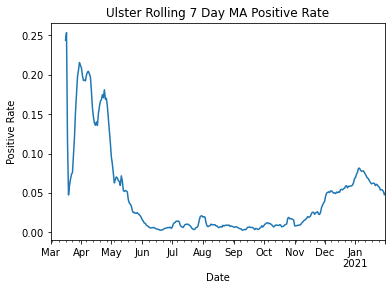

In [11]:
ulster['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Ulster Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [12]:
ulster['pos_hundred_thousand'].rolling(7).mean().tail(12)

Test Date
2021-01-20    57.923864
2021-01-21    54.705871
2021-01-22    54.786321
2021-01-23    54.625422
2021-01-24    53.016425
2021-01-25    51.729228
2021-01-26    49.878883
2021-01-27    50.844281
2021-01-28    48.108987
2021-01-29    47.224039
2021-01-30    44.327846
2021-01-31    44.810545
Name: pos_hundred_thousand, dtype: float64

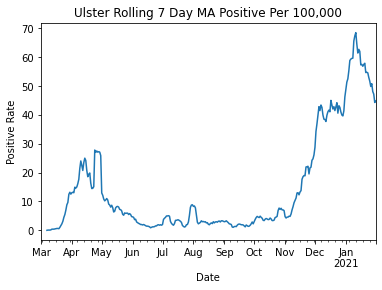

In [13]:
ulster['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Ulster Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [14]:
per_cap=np.sum(ulster['pos_hundred_thousand'].rolling(7).mean().tail(12).values >10)
pos_rate=np.sum(ulster['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 12 and pos_rate >= .5:
    print('LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS')
if (per_cap>=1) and (pos_rate>=.3 and pos_rate<.5):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .3):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS


# DUTCHESS COUNTY

Geographic area has 7-day rolling average positivity above 5% for 10 days  

AND  

Geographic area has 12 or more new daily cases per 100,000 residents on 7-day average  

In [15]:
dutchess=df.loc['Dutchess']
dutchess['New Positives/Total Tests']=dutchess['New Positives']/dutchess['Total Number of Tests Performed']
dutchess['pos_hundred_thousand']=(dutchess['New Positives']*100000)/294218
dutchess.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,216,16757,2553,420935,0.084606,73.414951
2021-01-19,206,16963,2290,423225,0.089956,70.016111
2021-01-20,219,17182,3421,426646,0.064016,74.434603
2021-01-21,242,17424,3529,430175,0.068575,82.251936
2021-01-22,199,17623,3313,433488,0.060066,67.636922
2021-01-23,190,17813,3300,436788,0.057576,64.577966
2021-01-24,191,18004,3462,440250,0.055170,64.917850
2021-01-25,231,18235,2538,442788,0.091017,78.513211
2021-01-26,142,18377,2451,445239,0.057936,48.263532


In [16]:
dutchess['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.071536
2021-01-23    0.071108
2021-01-24    0.068567
2021-01-25    0.069482
2021-01-26    0.064908
2021-01-27    0.063578
2021-01-28    0.062820
2021-01-29    0.062529
2021-01-30    0.062148
2021-01-31    0.062396
Name: New Positives/Total Tests, dtype: float64

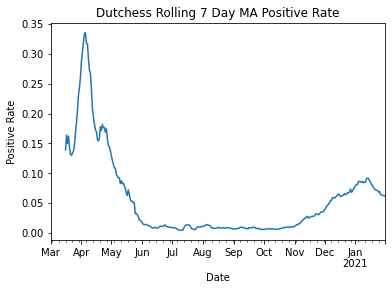

In [17]:
dutchess['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Dutchess Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [18]:
dutchess['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    73.220731
2021-01-23    72.152524
2021-01-24    71.035763
2021-01-25    71.764086
2021-01-26    68.656574
2021-01-27    66.568715
2021-01-28    64.335192
2021-01-29    65.306289
2021-01-30    63.606869
2021-01-31    62.732881
Name: pos_hundred_thousand, dtype: float64

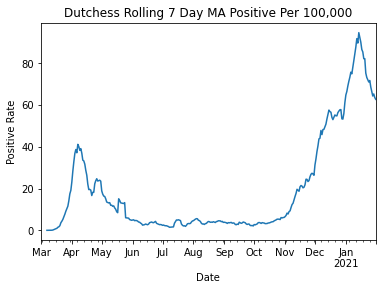

In [19]:
dutchess['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Dutchess Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [20]:
per_cap=np.sum(dutchess['pos_hundred_thousand'].rolling(7).mean().tail(12).values >10)
pos_rate=np.sum(dutchess['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 12 and pos_rate >= .5:
    print('LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS')
if (per_cap>=1) and (pos_rate>=.3 and pos_rate<.5):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .3):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT - MAJOR CONDITIONS FOR LOCKDOWN MET - CHECK https://www.governor.ny.gov/news/governor-cuomo-details-covid-19-micro-cluster-metrics FOR SMALL COUNTY DETAILS


# MONROE COUNTY

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [21]:
monroe=df.loc['Monroe']
monroe['New Positives/Total Tests']=monroe['New Positives']/monroe['Total Number of Tests Performed']
monroe['pos_hundred_thousand']=(monroe['New Positives']*100000)/741770
monroe.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,311,44318,5222,1064146,0.059556,41.926743
2021-01-19,313,44631,4525,1068671,0.069171,42.196368
2021-01-20,371,45002,7006,1075677,0.052955,50.015503
2021-01-21,398,45400,8569,1084246,0.046446,53.655446
2021-01-22,306,45706,7535,1091781,0.040610,41.252679
2021-01-23,358,46064,7447,1099228,0.048073,48.262939
2021-01-24,201,46265,5325,1104553,0.037746,27.097348
2021-01-25,211,46476,5678,1110231,0.037161,28.445475
2021-01-26,365,46841,6590,1116821,0.055387,49.206627


In [22]:
monroe['New Positives/Total Tests'].rolling(7).mean().tail(14)

Test Date
2021-01-18    0.065244
2021-01-19    0.063465
2021-01-20    0.061237
2021-01-21    0.058923
2021-01-22    0.057180
2021-01-23    0.054801
2021-01-24    0.050651
2021-01-25    0.047452
2021-01-26    0.045483
2021-01-27    0.044118
2021-01-28    0.041174
2021-01-29    0.039255
2021-01-30    0.037655
2021-01-31    0.036825
Name: New Positives/Total Tests, dtype: float64

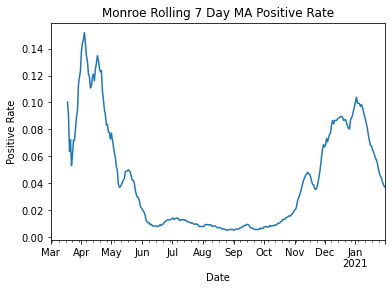

In [23]:
monroe['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Monroe Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [24]:
monroe['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    47.762206
2021-01-23    46.317784
2021-01-24    43.486718
2021-01-25    41.560823
2021-01-26    42.562288
2021-01-27    42.234886
2021-01-28    39.750481
2021-01-29    38.806792
2021-01-30    37.208299
2021-01-31    36.553495
Name: pos_hundred_thousand, dtype: float64

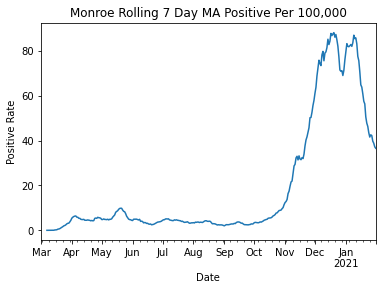

In [25]:
monroe['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Monroe Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [26]:
per_cap=np.sum(monroe['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(monroe['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# Manhattan 

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [27]:
manhattan=df.loc['New York']
manhattan['New Positives/Total Tests']=manhattan['New Positives']/manhattan['Total Number of Tests Performed']
manhattan['pos_hundred_thousand']=(manhattan['New Positives']*100000)/1628706
manhattan.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,688,77441,16539,3021173,0.041599,42.242124
2021-01-19,722,78163,14336,3035509,0.050363,44.329670
2021-01-20,717,78880,18234,3053743,0.039322,44.022678
2021-01-21,932,79812,28980,3082723,0.032160,57.223342
2021-01-22,856,80668,28276,3110999,0.030273,52.557061
2021-01-23,814,81482,28900,3139899,0.028166,49.978326
2021-01-24,916,82398,24684,3164583,0.037109,56.240967
2021-01-25,850,83248,18151,3182734,0.046829,52.188670
2021-01-26,686,83934,20554,3203288,0.033375,42.119327


In [28]:
manhattan['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.037128
2021-01-23    0.036685
2021-01-24    0.036999
2021-01-25    0.037746
2021-01-26    0.035319
2021-01-27    0.034766
2021-01-28    0.034521
2021-01-29    0.034434
2021-01-30    0.034945
2021-01-31    0.034195
Name: New Positives/Total Tests, dtype: float64

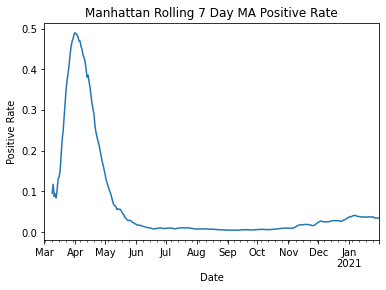

In [29]:
manhattan['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Manhattan Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [30]:
manhattan['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    47.855695
2021-01-23    47.364507
2021-01-24    49.513452
2021-01-25    50.934388
2021-01-26    50.618624
2021-01-27    52.425493
2021-01-28    51.995704
2021-01-29    52.407950
2021-01-30    52.074644
2021-01-31    49.583622
Name: pos_hundred_thousand, dtype: float64

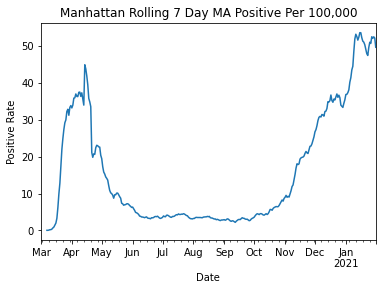

In [31]:
manhattan['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Manhattan Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [32]:
per_cap=np.sum(manhattan['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(manhattan['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN PENDING


# QUEENS

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [33]:
queens=df.loc['Queens']
queens['New Positives/Total Tests']=queens['New Positives']/queens['Total Number of Tests Performed']
queens['pos_hundred_thousand']=(queens['New Positives']*100000)/2253858
queens.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,1669,154688,25044,3147878,0.066643,74.050805
2021-01-19,2722,157410,33457,3181335,0.081358,120.770696
2021-01-20,1455,158865,23754,3205089,0.061253,64.555975
2021-01-21,1798,160663,30448,3235537,0.059051,79.774325
2021-01-22,1792,162455,31137,3266674,0.057552,79.508115
2021-01-23,1764,164219,32177,3298851,0.054822,78.265800
2021-01-24,1591,165810,32393,3331244,0.049116,70.590073
2021-01-25,1532,167342,20091,3351335,0.076253,67.972339
2021-01-26,1442,168784,23996,3375331,0.060093,63.979186


In [34]:
queens['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.063599
2021-01-23    0.063395
2021-01-24    0.061399
2021-01-25    0.062772
2021-01-26    0.059734
2021-01-27    0.059265
2021-01-28    0.058459
2021-01-29    0.058211
2021-01-30    0.056847
2021-01-31    0.056802
Name: New Positives/Total Tests, dtype: float64

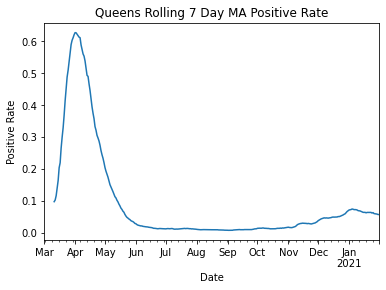

In [35]:
queens['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Queens Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [36]:
queens['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    80.110257
2021-01-23    80.617324
2021-01-24    81.073684
2021-01-25    80.205332
2021-01-26    72.092259
2021-01-27    74.088835
2021-01-28    73.036671
2021-01-29    73.150761
2021-01-30    70.780223
2021-01-31    68.289256
Name: pos_hundred_thousand, dtype: float64

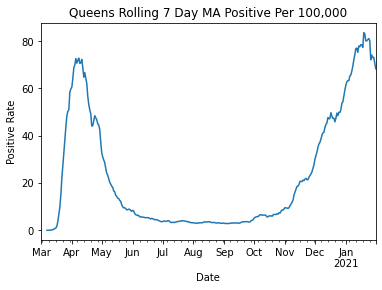

In [37]:
queens['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Queens Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [38]:
per_cap=np.sum(queens['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(queens['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# BROOKLYN

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [39]:
brooklyn=df.loc['Kings']
brooklyn['New Positives/Total Tests']=brooklyn['New Positives']/brooklyn['Total Number of Tests Performed']
brooklyn['pos_hundred_thousand']=(brooklyn['New Positives']*100000)/2559903
brooklyn.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,1510,151973,23319,3571871,0.064754,58.986610
2021-01-19,1870,153843,28694,3600565,0.065170,73.049643
2021-01-20,1581,155424,25534,3626099,0.061917,61.760153
2021-01-21,1836,157260,34873,3660972,0.052648,71.721468
2021-01-22,1596,158856,31588,3692560,0.050526,62.346112
2021-01-23,1513,160369,31974,3724534,0.047320,59.103802
2021-01-24,1595,161964,27854,3752388,0.057263,62.307048
2021-01-25,1372,163336,19888,3772276,0.068986,53.595781
2021-01-26,1600,164936,28205,3800481,0.056728,62.502368


In [40]:
brooklyn['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.058660
2021-01-23    0.057861
2021-01-24    0.057085
2021-01-25    0.057690
2021-01-26    0.056484
2021-01-27    0.055441
2021-01-28    0.055551
2021-01-29    0.055873
2021-01-30    0.056005
2021-01-31    0.055658
Name: New Positives/Total Tests, dtype: float64

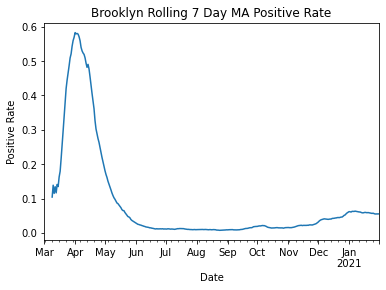

In [41]:
brooklyn['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Brooklyn Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [42]:
brooklyn['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    64.756918
2021-01-23    63.891930
2021-01-24    64.182119
2021-01-25    63.412001
2021-01-26    61.905247
2021-01-27    63.300390
2021-01-28    62.753494
2021-01-29    63.947736
2021-01-30    63.992380
2021-01-31    61.961053
Name: pos_hundred_thousand, dtype: float64

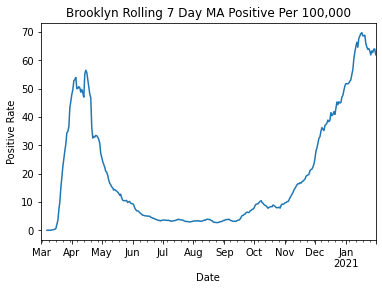

In [43]:
brooklyn['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Brooklyn Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [44]:
per_cap=np.sum(brooklyn['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(brooklyn['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# BRONX

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [45]:
bronx=df.loc['Bronx']
bronx['New Positives/Total Tests']=bronx['New Positives']/bronx['Total Number of Tests Performed']
bronx['pos_hundred_thousand']=(bronx['New Positives']*100000)/1418207
bronx.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,1057,102227,13779,1909709,0.076711,74.530728
2021-01-19,789,103016,11814,1921523,0.066785,55.633628
2021-01-20,1087,104103,14683,1936206,0.074031,76.646075
2021-01-21,1256,105359,18045,1954251,0.069604,88.562530
2021-01-22,1227,106586,17143,1971394,0.071574,86.517695
2021-01-23,1229,107815,16911,1988305,0.072675,86.658718
2021-01-24,1180,108995,17973,2006278,0.065654,83.203651
2021-01-25,966,109961,11351,2017629,0.085103,68.114175
2021-01-26,885,110846,14393,2032022,0.061488,62.402738


In [46]:
bronx['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.073188
2021-01-23    0.073666
2021-01-24    0.071005
2021-01-25    0.072204
2021-01-26    0.071447
2021-01-27    0.070736
2021-01-28    0.069988
2021-01-29    0.069664
2021-01-30    0.068850
2021-01-31    0.069690
Name: New Positives/Total Tests, dtype: float64

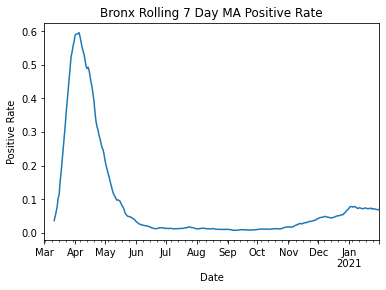

In [47]:
bronx['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Bronx Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [48]:
bronx['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    76.112202
2021-01-23    77.562725
2021-01-24    78.821860
2021-01-25    77.905210
2021-01-26    78.872226
2021-01-27    80.322750
2021-01-28    79.315441
2021-01-29    78.469303
2021-01-30    76.676294
2021-01-31    73.634224
Name: pos_hundred_thousand, dtype: float64

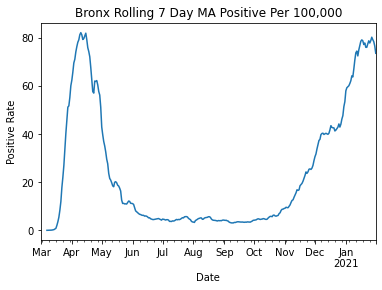

In [49]:
bronx['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Bronx Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [50]:
per_cap=np.sum(bronx['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(bronx['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT


# STATEN ISLAND

Geographic area has 7-day rolling average positivity above 4% for 10 days  

AND  

Geographic area has 10 or more new daily cases per 100,000 residents on 7-day average

In [51]:
richmond=df.loc['Richmond']
richmond['New Positives/Total Tests']=richmond['New Positives']/richmond['Total Number of Tests Performed']
richmond['pos_hundred_thousand']=(richmond['New Positives']*100000)/476143
richmond.tail(14)

,New Positives,Cumulative Number of Positives,Total Number of Tests Performed,Cumulative Number of Tests Performed,New Positives/Total Tests,pos_hundred_thousand
Test Date,,,,,,
2021-01-18,426,44678,6373,859793,0.066845,89.468920
2021-01-19,491,45169,7235,867028,0.067865,103.120281
2021-01-20,358,45527,6067,873095,0.059008,75.187496
2021-01-21,485,46012,8559,881654,0.056665,101.860155
2021-01-22,389,46401,7315,888969,0.053178,81.698145
2021-01-23,440,46841,7652,896621,0.057501,92.409213
2021-01-24,413,47254,6679,903300,0.061836,86.738648
2021-01-25,361,47615,5985,909285,0.060317,75.817559
2021-01-26,334,47949,6380,915665,0.052351,70.146994


In [52]:
richmond['New Positives/Total Tests'].rolling(7).mean().tail(10)

Test Date
2021-01-22    0.060979
2021-01-23    0.061010
2021-01-24    0.060414
2021-01-25    0.059482
2021-01-26    0.057265
2021-01-27    0.055797
2021-01-28    0.054307
2021-01-29    0.053038
2021-01-30    0.050701
2021-01-31    0.049537
Name: New Positives/Total Tests, dtype: float64

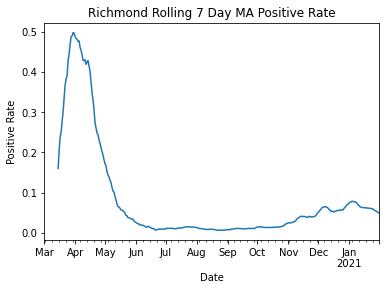

In [53]:
richmond['New Positives/Total Tests'].rolling(7).mean().plot()
plt.title('Richmond Rolling 7 Day MA Positive Rate')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [54]:
richmond['pos_hundred_thousand'].rolling(7).mean().tail(10)

Test Date
2021-01-22    90.999073
2021-01-23    90.879061
2021-01-24    90.068980
2021-01-25    88.118785
2021-01-26    83.408316
2021-01-27    83.078283
2021-01-28    79.657942
2021-01-29    78.847861
2021-01-30    74.047383
2021-01-31    69.306910
Name: pos_hundred_thousand, dtype: float64

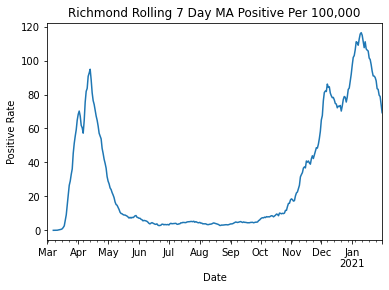

In [55]:
richmond['pos_hundred_thousand'].rolling(7).mean().plot()
plt.title('Richmond Rolling 7 Day MA Positive Per 100,000')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.show()

In [56]:
per_cap=np.sum(richmond['pos_hundred_thousand'].rolling(7).mean().tail(10).values >10)
pos_rate=np.sum(richmond['New Positives/Total Tests'].rolling(7).mean().tail(10).values)
if per_cap == 10 and pos_rate >= .4:
    print('LOCKDOWN IMMINENT')
if (per_cap>=1) and (pos_rate>=.2 and pos_rate<.4):
    print('LOCKDOWN PENDING')   
if (pos_rate <= .2):
    print('LOCKDOWN UNLIKELY')

LOCKDOWN IMMINENT
